<a href="https://colab.research.google.com/github/thantzintun232/AI-for-Indoor-Air-Quality-Forecasting/blob/main/NTLL_Single_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
full_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/cleaned_air_quality.csv')
full_df.head()

,installation_name,installation_site,timestamp,pm2_5,temp_aq,humidity_aq,voc_aq,co2_gas,source_file,date,weekday,is_weekend
0,External - front of James Graham,Headingley Campus,2025-03-01 00:04:58,24.09,3.039062,76.490273,231.0,688.0,2025-03-01.xlsx,2025-03-01,Saturday,True
1,External - front of James Graham,Headingley Campus,2025-03-01 00:09:58,24.19,2.796875,76.534142,236.0,713.0,2025-03-01.xlsx,2025-03-01,Saturday,True
2,External - front of James Graham,Headingley Campus,2025-03-01 00:14:58,27.03,2.507812,77.245590,244.0,723.0,2025-03-01.xlsx,2025-03-01,Saturday,True
3,External - front of James Graham,Headingley Campus,2025-03-01 00:19:58,24.36,2.273438,80.606392,228.0,633.0,2025-03-01.xlsx,2025-03-01,Saturday,True
4,External - front of James Graham,Headingley Campus,2025-03-01 00:24:58,25.00,2.281250,79.978867,223.0,660.0,2025-03-01.xlsx,2025-03-01,Saturday,True


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

co2_values = full_df[['co2_gas']].values

split_index = int(len(co2_values) * 0.8)
train_data = co2_values[:split_index]
test_data  = co2_values[split_index:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled  = scaler.transform(test_data)

scaled = np.vstack([train_scaled, test_scaled])

def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled, window_size)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train_lstm = X_train.reshape((X_train.shape[0], window_size, 1))
X_test_lstm  = X_test.reshape((X_test.shape[0], window_size, 1))

X_train_knn = X_train.reshape((X_train.shape[0], window_size))
X_test_knn  = X_test.reshape((X_test.shape[0], window_size))

print("X_train LSTM:", X_train_lstm.shape)
print("X_train KNN :", X_train_knn.shape)
print("y_train:", y_train.shape)


X_train LSTM: (59350, 10, 1)
X_train KNN : (59350, 10)
y_train: (59350, 1)


# KNN

KNN Results:
MAE: 0.05005698169102758
RMSE: 0.07404978607456018
MAPE: 19.484172230080617
R²: 0.7739011526626504


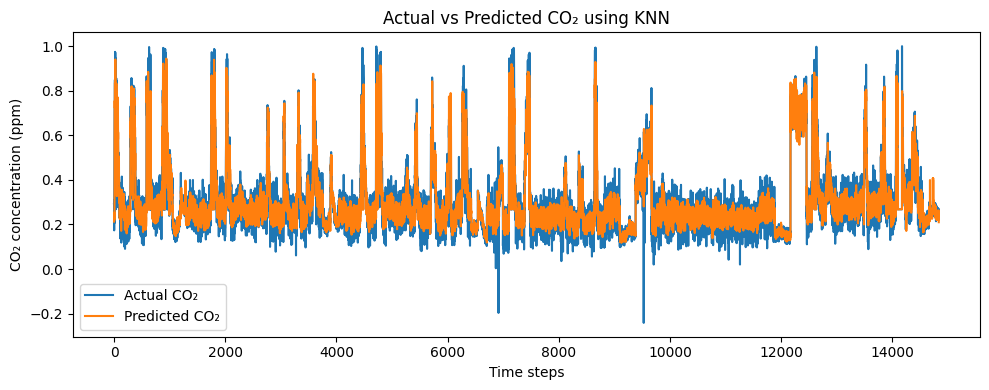

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train_knn, y_train)

y_pred_knn = knn.predict(X_test_knn)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mape = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
r2 = r2_score(y_test, y_pred_knn)

print("KNN Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R²:", r2)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual CO₂")
plt.plot(y_pred_knn, label="Predicted CO₂")
plt.xlabel("Time steps")
plt.ylabel("CO₂ concentration (ppm)")
plt.title("Actual vs Predicted CO₂ using KNN")
plt.legend()
plt.tight_layout()
plt.show()


# LSTM

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1855/1855 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0085 - val_loss: 0.0052
Epoch 2/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 3/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 4/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 5/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 6/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 7/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 8/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 9/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 10/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 11/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 12/50
1855/1855 ━━━━━━━━━━━━━━━━━━━

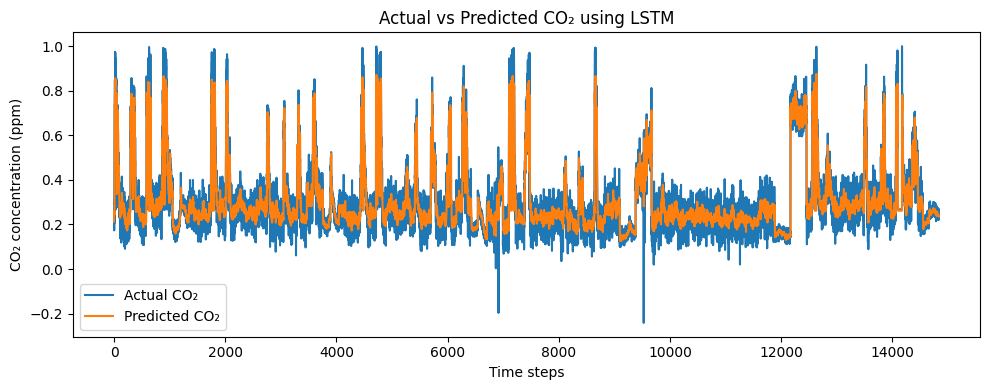

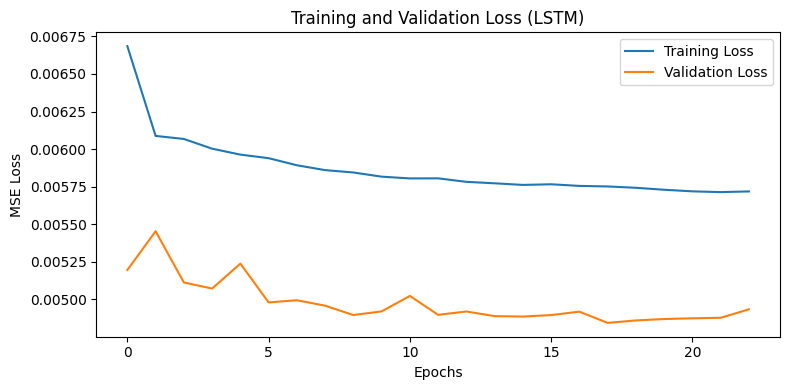

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=50, batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_lstm = model.predict(X_test_lstm)

mae = mean_absolute_error(y_test, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred_lstm) / (y_test + epsilon))) * 100

r2 = r2_score(y_test, y_pred_lstm)

print("LSTM Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R²  :", r2)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual CO₂")
plt.plot(y_pred_lstm, label="Predicted CO₂")
plt.xlabel("Time steps")
plt.ylabel("CO₂ concentration (ppm)")
plt.title("Actual vs Predicted CO₂ using LSTM")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss (LSTM)")
plt.legend()
plt.tight_layout()
plt.show()


# GRU

Epoch 1/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0101 - val_loss: 0.0053
Epoch 2/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 3/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 4/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 5/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 6/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 7/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 8/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 9/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 10/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 11/50
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 12/50
1855/1855 ━━━━━━━━

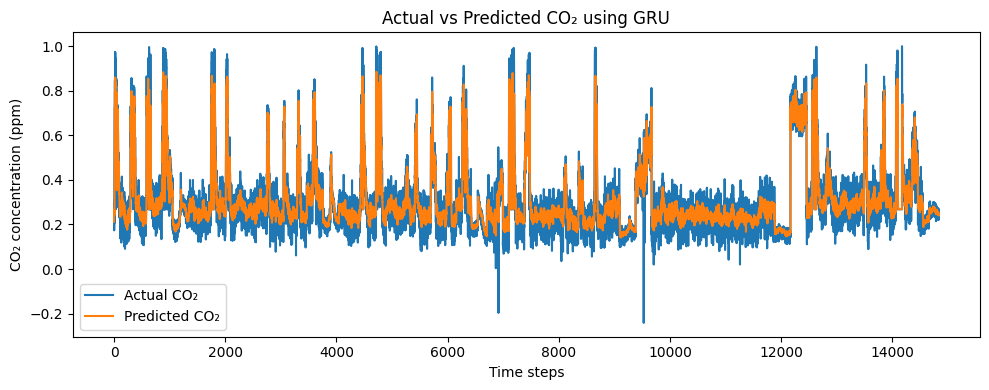

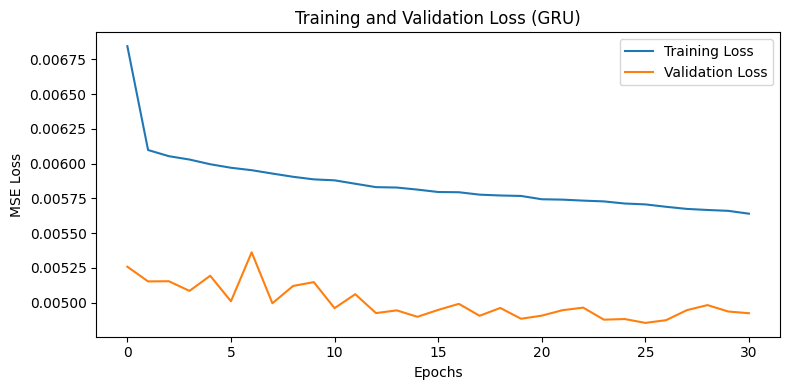

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

gru = Sequential([
    GRU(64, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
gru.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_gru = gru.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=50, batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_gru = gru.predict(X_test_lstm)

mae  = mean_absolute_error(y_test, y_pred_gru)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gru))

epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred_gru) / (y_test + epsilon))) * 100

r2 = r2_score(y_test, y_pred_gru)

print("GRU Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R²  :", r2)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual CO₂")
plt.plot(y_pred_gru, label="Predicted CO₂")
plt.xlabel("Time steps")
plt.ylabel("CO₂ concentration (ppm)")
plt.title("Actual vs Predicted CO₂ using GRU")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_gru.history['loss'], label="Training Loss")
plt.plot(history_gru.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss (GRU)")
plt.legend()
plt.tight_layout()
plt.show()
